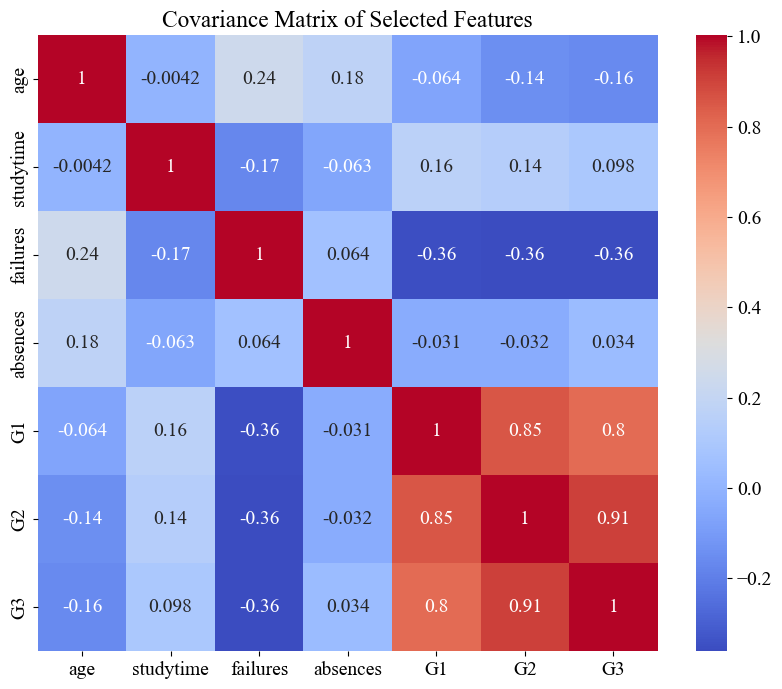

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set Times New Roman font for all plots
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Replace with your actual name
your_name = "JackSchenck"

# -----------------------------
# 1. Load and Preprocess Dataset
# -----------------------------
df = pd.read_csv("student-mat.csv")

# Select at least four numeric features
features = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
X = df[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# -----------------------------
# 2. Covariance Matrix & Heatmap
# -----------------------------
cov_matrix = np.cov(X_std.T)

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, xticklabels=features, yticklabels=features,
            cmap='coolwarm', cbar=True)
plt.title("Covariance Matrix of Selected Features")
plt.savefig(f"Lab5_{your_name}_CovarianceMatrix.png", dpi=300)
plt.show()

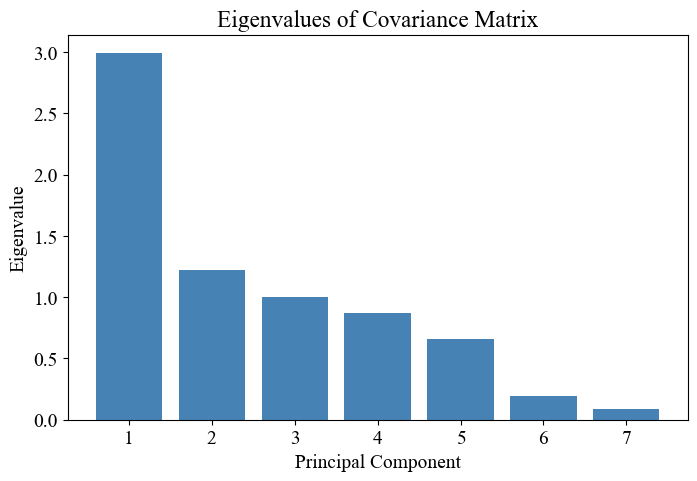

In [2]:
# -----------------------------
# 3. Eigenvalues & Eigenvectors
# -----------------------------
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Bar chart of eigenvalues
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='steelblue')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Covariance Matrix")
plt.savefig(f"Lab5_{your_name}_Eigenvalues.png", dpi=300)
plt.show()

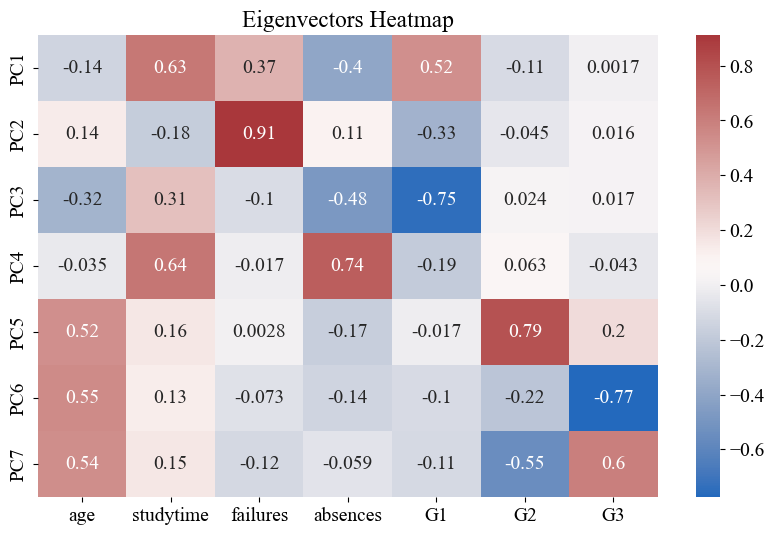

In [3]:
# Heatmap of eigenvectors
plt.figure(figsize=(10, 6))
sns.heatmap(eigenvectors, annot=True, cmap="vlag", xticklabels=features,
            yticklabels=[f"PC{i+1}" for i in range(len(features))])
plt.title("Eigenvectors Heatmap")
plt.savefig(f"Lab5_{your_name}_EigenvectorsHeatmap.png", dpi=300)
plt.show()

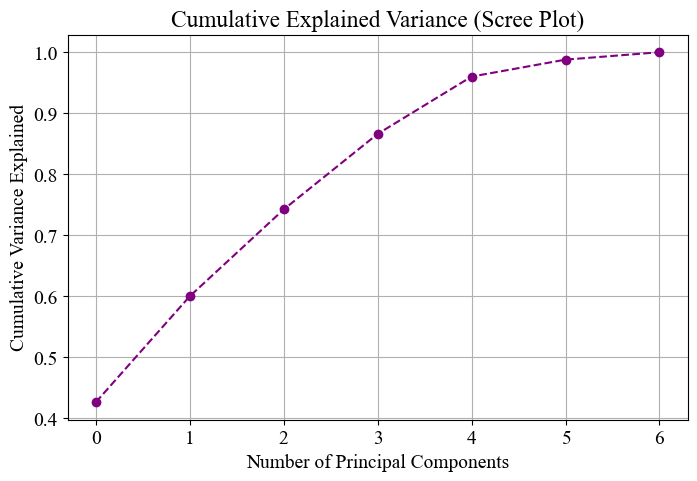

In [4]:
# -----------------------------
# 4. PCA & More Visualizations
# -----------------------------
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='purple')
plt.title("Cumulative Explained Variance (Scree Plot)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.savefig(f"Lab5_{your_name}_ScreePlot.png", dpi=300)
plt.show()

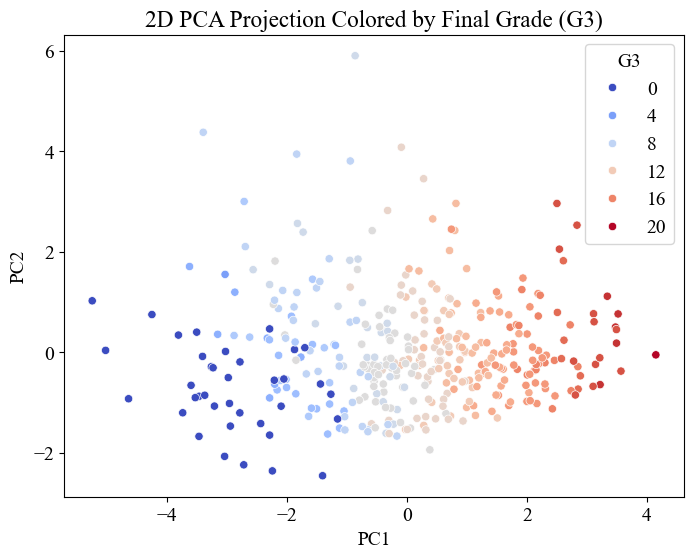

In [5]:
# 2D Scatter plot (PC1 vs PC2) colored by final grade G3
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X['G3'], palette="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Projection Colored by Final Grade (G3)")
#plt.colorbar(label="G3")
plt.savefig(f"Lab5_{your_name}_PCA2D_G3.png", dpi=300)
plt.show()

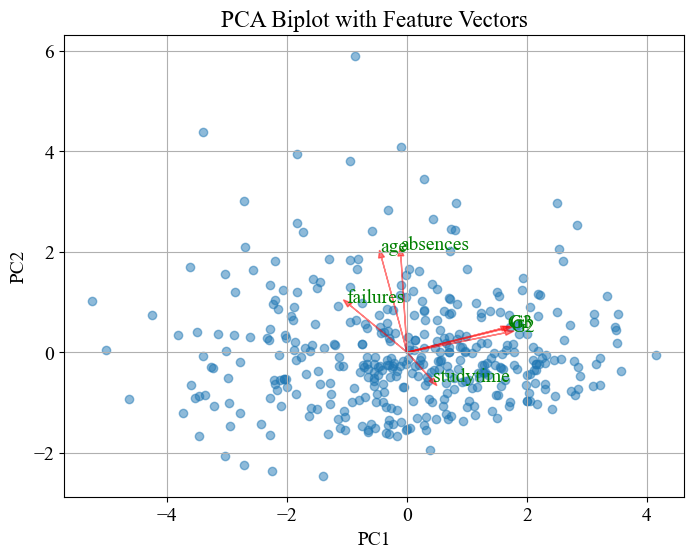

'\n- Data: The student-mat.csv dataset includes student performance and demographics.\n- Preprocessing: Selected 7 numeric columns, standardized for PCA.\n- Covariance Matrix: Revealed relationships, e.g., G1-G3 are highly correlated.\n- Eigenvalues: Show variance contribution of each principal component.\n- Scree Plot: First 2–3 components explain most variance.\n- 2D PCA: Shows structure and grading trends by PC1 and PC2.\n- Biplot: Feature vectors point in directions of greatest variance.\n'

In [6]:
# Biplot (PC1 vs PC2 with feature vectors)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
for i, feature in enumerate(features):
    plt.arrow(0, 0, eigenvectors[i, 0]*3, eigenvectors[i, 1]*3, 
              color='r', alpha=0.5, head_width=0.1)
    plt.text(eigenvectors[i, 0]*3.2, eigenvectors[i, 1]*3.2, feature, color='g')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot with Feature Vectors")
plt.grid(True)
plt.savefig(f"Lab5_{your_name}_Biplot.png", dpi=300)
plt.show()

# -----------------------------
# 5. Documentation & Comments
# -----------------------------
"""
- Data: The student-mat.csv dataset includes student performance and demographics.
- Preprocessing: Selected 7 numeric columns, standardized for PCA.
- Covariance Matrix: Revealed relationships, e.g., G1-G3 are highly correlated.
- Eigenvalues: Show variance contribution of each principal component.
- Scree Plot: First 2–3 components explain most variance.
- 2D PCA: Shows structure and grading trends by PC1 and PC2.
- Biplot: Feature vectors point in directions of greatest variance.
"""

# Each image is saved as required: Lab5_YourName_Title.png